<a href="https://colab.research.google.com/github/TarieGumbo/BP_Public-/blob/main/visualise_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Tweet Analysis

## Workflow
1. Install Packages
2. Get data
3. Visually perform sentiment analysis
  * plot number of positive, negative, neutral tweets each day
  * plot the proportion of postive, negative, neutral tweets
  * create a word cloud from the tweets

## 1. Install packges

In [27]:
from google.colab import output
!pip install snscrape
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/tweets.py
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
!pip install TextBlob
output.clear()
print("Required packages installed")

Required packages installed


## 2. Get the Data

In [28]:
from tweets import tweets_to_df
help(tweets_to_df)

Help on function tweets_to_df in module tweets:

tweets_to_df(what, since='2022-01-01', until='2022-01-31', max_tweets=500)
    Performs a simple term based search of twitter tweets to get
    the date and message of the tweet.
    
    Parameters
    ----------
    what: str
      The search term
    since: str, YYYY-MM-DD, optional
      The date to start search from (default 2022-01-01)
    until: str, YYYY-MM-DD, optional
      The date to search to (default 2022-01-31)
    max_tweets: int, optional
      The maximum number of tweets to return (default 500)
    
    Returns
    -------
    Pandas Dataframe of date and the tweet message.  The message has
    been *cleaned* to remove emojis and non english letters.



In [4]:
# Run get_tweets() method.  Your choice of keyword
search_term = input('Please input a search term: ')
tweets_df = tweets_to_df(search_term)

Please input a search term: Fire


In [5]:
tweets_df.head(10)

,Date,Clean Text
0,2022-01-30,My imagination completely controls me and fore...
1,2022-01-30,Pattonville Fire Protection District is curren...
2,2022-01-30,Rptd car on fire close to the house
3,2022-01-30,Actually pretty fire
4,2022-01-30,Pattonville Fire Protection District is curren...
5,2022-01-30,Love Pistacio nuts Not only do they taste grea...
6,2022-01-30,Upshot Climate change will increase wildfires ...
7,2022-01-30,Fire holy
8,2022-01-30,Warner trying to fire up the rams Stop it
9,2022-01-30,Dinky Di Ride On Fire Gold Wave Al Kent Mix 12...


## 3. Perform Sentiment Analysis
The sentiment function of textblob returns two properties, polarity, and subjectivity.

See: https://textblob.readthedocs.io/en/dev/index.html


### Polarity
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

### Subjectivity
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [7]:
from textblob import TextBlob

# Wrapper so can use Pandas apply() function on a column
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Calculate sentiment, 
tweets_df['Subjectivity'] = tweets_df['Clean Text'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Clean Text'].apply(getPolarity)

tweets_df.head(20)

,Date,Clean Text,Subjectivity,Polarity
0,2022-01-30,My imagination completely controls me and fore...,0.337500,0.162500
1,2022-01-30,Pattonville Fire Protection District is curren...,0.400000,0.000000
2,2022-01-30,Rptd car on fire close to the house,0.000000,0.000000
3,2022-01-30,Actually pretty fire,1.000000,0.250000
4,2022-01-30,Pattonville Fire Protection District is curren...,0.400000,0.000000
5,2022-01-30,Love Pistacio nuts Not only do they taste grea...,0.507143,0.410714
6,2022-01-30,Upshot Climate change will increase wildfires ...,0.400000,-0.316667
7,2022-01-30,Fire holy,0.000000,0.000000
8,2022-01-30,Warner trying to fire up the rams Stop it,0.000000,0.000000
9,2022-01-30,Dinky Di Ride On Fire Gold Wave Al Kent Mix 12...,0.000000,0.000000


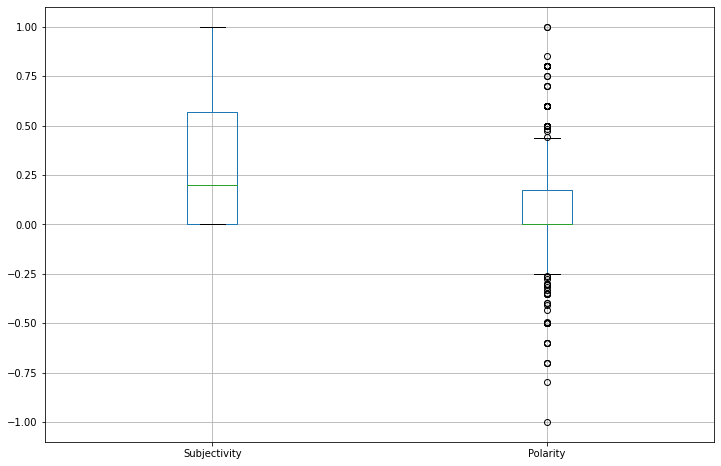

In [12]:
# Do a box plot of columns Subjectivity and Polarity
tweets_df.boxplot(column =["Subjectivity" , "Polarity"], grid=True, figsize=(12,8))


# Sentiment over time.

From the documentaiton, the values of polsrity can be interpreted a sentiment.  So we can *calculate* the sentiment of each tweet as either positive, negative or neutral.

> There are more precise ways, keeping it simple for thie exercise.

It could be interesting to plot these over time.  SO each day there is a number of tweets, what proportions are positive, negative or neutral.

First let us add a sentiment column


In [9]:
def sentiment(polarity):
  if polarity > 0:
      return 'positive'
  elif polarity == 0:
      return 'neutral'
  else:
      return 'negative'

In [15]:
# Add sentiment column
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentiment)
tweets_df.head(20)

,Date,Clean Text,Subjectivity,Polarity,Sentiment
0,2022-01-30,My imagination completely controls me and fore...,0.337500,0.162500,positive
1,2022-01-30,Pattonville Fire Protection District is curren...,0.400000,0.000000,neutral
2,2022-01-30,Rptd car on fire close to the house,0.000000,0.000000,neutral
3,2022-01-30,Actually pretty fire,1.000000,0.250000,positive
4,2022-01-30,Pattonville Fire Protection District is curren...,0.400000,0.000000,neutral
5,2022-01-30,Love Pistacio nuts Not only do they taste grea...,0.507143,0.410714,positive
6,2022-01-30,Upshot Climate change will increase wildfires ...,0.400000,-0.316667,negative
7,2022-01-30,Fire holy,0.000000,0.000000,neutral
8,2022-01-30,Warner trying to fire up the rams Stop it,0.000000,0.000000,neutral
9,2022-01-30,Dinky Di Ride On Fire Gold Wave Al Kent Mix 12...,0.000000,0.000000,neutral


In [18]:
# Lets get just the positive tweets
pos = tweets_df[tweets_df['Sentiment']=='positive']
pos.head(20)

,Date,Clean Text,Subjectivity,Polarity,Sentiment
0,2022-01-30,My imagination completely controls me and fore...,0.337500,0.162500,positive
3,2022-01-30,Actually pretty fire,1.000000,0.250000,positive
5,2022-01-30,Love Pistacio nuts Not only do they taste grea...,0.507143,0.410714,positive
10,2022-01-30,I m guessing the last segment where it s just ...,0.533333,0.250000,positive
14,2022-01-30,When I was in Middle School you were my go to ...,0.375000,0.062500,positive
15,2022-01-30,Review Like literally in the pilot he was read...,0.575000,0.275000,positive
17,2022-01-30,matuschak Principe s Secrets of alchemy is the...,0.290476,0.169841,positive
18,2022-01-30,Just what we need Hope he s ok He has been on ...,0.550000,0.100000,positive
22,2022-01-30,justan anyways Sights locked on anyways fire w...,0.500000,0.200000,positive
24,2022-01-30,SO FIRE HIM Thank him for what he s done to ge...,0.470000,0.280000,positive


Write a function to calculate how many each day.  We will write a function because want to do this for negative and netural tweets.

In [19]:
def num_tweets(df):
    return df['Date'].value_counts().sort_index()

pos_per_day = num_tweets(pos)

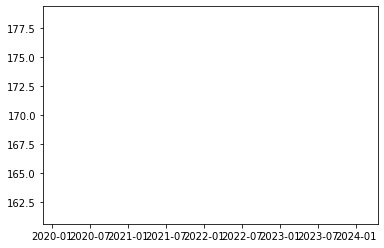

In [29]:
# Plot the positive tweets per day
pos_per_day.plot()

In [21]:
# Now repeat for negative
neg = tweets_df[tweets_df['Sentiment']=='negative']
neg.head(20)

,Date,Clean Text,Subjectivity,Polarity,Sentiment
6,2022-01-30,Upshot Climate change will increase wildfires ...,0.400000,-0.316667,negative
19,2022-01-30,If Harbaugh allows Roman to remain OC for the ...,0.563889,-0.022222,negative
23,2022-01-30,My first Fire Emblem the game that got me hook...,0.477778,-0.216667,negative
25,2022-01-30,Are you feeling the fire cheater chicken,0.950000,-0.600000,negative
29,2022-01-30,My training department is very cool a gunsling...,0.969000,-0.409000,negative
30,2022-01-30,Fire Bruh I wish ain t no way I can afford tha...,0.800000,-0.200000,negative
36,2022-01-30,A little fire never hurt anyone,0.500000,-0.187500,negative
42,2022-01-30,the art dealer Imagine being so bad that the C...,0.666667,-0.700000,negative
52,2022-01-30,Lacazette and Nketiah don t fire you in UCL wo...,1.000000,-0.500000,negative
54,2022-01-30,Excuse me as I quote these fire lyrics that I ...,0.570000,-0.170000,negative


In [22]:
def num_tweets(df):
    return df['Date'].value_counts().sort_index()

neg_per_day = num_tweets(neg)

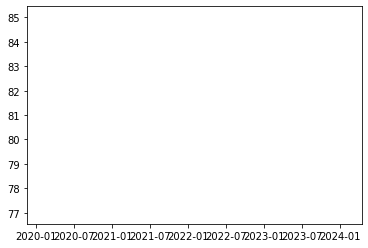

In [23]:
# Plot the negative tweets per day
neg_per_day.plot()

In [24]:
# repeat for neutral
neut = tweets_df[tweets_df['Sentiment']=='neutral']
neut.head(20)

,Date,Clean Text,Subjectivity,Polarity,Sentiment
1,2022-01-30,Pattonville Fire Protection District is curren...,0.40,0.0,neutral
2,2022-01-30,Rptd car on fire close to the house,0.00,0.0,neutral
4,2022-01-30,Pattonville Fire Protection District is curren...,0.40,0.0,neutral
7,2022-01-30,Fire holy,0.00,0.0,neutral
8,2022-01-30,Warner trying to fire up the rams Stop it,0.00,0.0,neutral
9,2022-01-30,Dinky Di Ride On Fire Gold Wave Al Kent Mix 12...,0.00,0.0,neutral
11,2022-01-30,we re at the fire hydrant i m wearing a blue s...,0.05,0.0,neutral
12,2022-01-30,Community is also fire,0.00,0.0,neutral
13,2022-01-30,Oof hopefully fire crews can get to it in a ti...,0.00,0.0,neutral
16,2022-01-30,the nfl is on fire the bandwagon is filling wi...,0.00,0.0,neutral


In [25]:
def num_tweets(df):
    return df['Date'].value_counts().sort_index()

neut_per_day = num_tweets(neut)

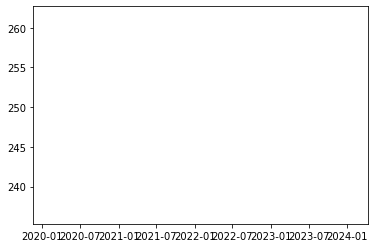

In [26]:
# Plot the neutral tweets per day
neut_per_day.plot()

How about propotions of sentiment type?

Visit Python Graph Gallery, 'Part of the Whole', select 'Pie' and loot at the example

([<matplotlib.patches.Wedge at 0x7fd0518b6590>,
 [Text(0.5299290306818474, 0.9639373540021144, ''),
  Text(-0.9672479537657722, 0.5238620008512994, ''),
  Text(0.006911472368401023, -1.0999782868537455, '')])

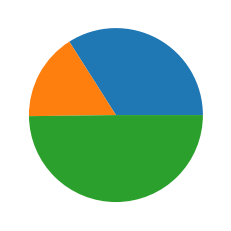

In [30]:
import matplotlib.pyplot as plt
values = [len(pos), len(neg), len(neut)]
plt.pie(values)

We can do better. 

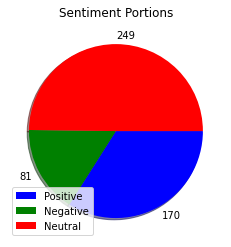

In [32]:
import matplotlib.pyplot as plt
 
values = [len(pos), len(neg), len(neut)]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['b', 'g', 'r']
plt.pie(values, colors=colors, labels= values, counterclock=False, shadow=True)
plt.title('Sentiment Portions')
plt.legend(labels,loc=3)
plt.show()

## WordCloud

Visit Python Graph Gallery, 'Ranking', select 'Word Cloud' and loot at the example

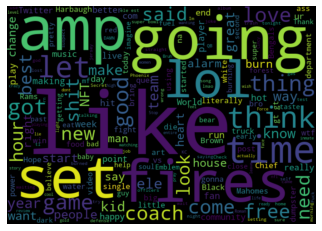

In [33]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import ENGLISH_STOP_WORDS

# Get all the messages
messages = ' '.join(tweets_df['Clean Text'])

stop_words = ENGLISH_STOP_WORDS.add(search_term)    
# Create the wordcloud object
wordcloud = WordCloud(width=680, height=480, margin=0, 
                      stopwords=ENGLISH_STOP_WORDS).generate(messages)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()